In [1]:
%load_ext rpy2.ipython

In [195]:
%%R
data <- read.table("takehome_report.csv", sep = ",", header = T)
data[1:3,]

  wage educ exper tenure nonwhite female married numdep smsa northcen south
1 3.10   11     2      0        0      1       0      2    1        0     0
2 3.24   12    22      2        0      1       1      3    1        0     0
3 3.00   11     2      0        0      0       0      2    0        0     0
  west construc ndurman trcommpu trade services profserv profocc clerocc
1    1        0       0        0     0        0        0       0       0
2    1        0       0        0     0        1        0       0       0
3    1        0       0        0     1        0        0       0       0
  servocc    lwage expersq tenursq
1       0 1.131402       4       0
2       1 1.175573     484       4
3       0 1.098612       4       0


In [196]:
%%R
nonwhite_female <- data$female*data$nonwhite
educsq <- data$educ^2
fit <- lm(lwage~ educ+educsq+exper+expersq+tenure+tenursq+numdep+log(tenure+1)+
          as.factor(female)+as.factor(nonwhite)+as.factor(married)+
          as.factor(smsa)+as.factor(northcen)+as.factor(south)+as.factor(west)+
          as.factor(construc)+as.factor(ndurman)+as.factor(trcommpu)+as.factor(trade)+
          as.factor(services)+as.factor(profserv)+as.factor(profocc)+
          as.factor(clerocc)+as.factor(servocc)+nonwhite_female,data)
summary(fit)


Call:
lm(formula = lwage ~ educ + educsq + exper + expersq + tenure + 
    tenursq + numdep + log(tenure + 1) + as.factor(female) + 
    as.factor(nonwhite) + as.factor(married) + as.factor(smsa) + 
    as.factor(northcen) + as.factor(south) + as.factor(west) + 
    as.factor(construc) + as.factor(ndurman) + as.factor(trcommpu) + 
    as.factor(trade) + as.factor(services) + as.factor(profserv) + 
    as.factor(profocc) + as.factor(clerocc) + as.factor(servocc) + 
    nonwhite_female, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.69186 -0.21017 -0.00998  0.19911  1.26685 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)           1.322e+00  1.877e-01   7.047 6.10e-12 ***
educ                 -3.683e-02  2.796e-02  -1.318 0.188255    
educsq                3.630e-03  1.169e-03   3.106 0.002007 ** 
exper                 2.751e-02  5.094e-03   5.401 1.02e-07 ***
expersq              -5.795e-04  1.086e-04  -5.335 1.45e-

In [4]:
%%R
library("MASS")
stepAIC(fit)

Start:  AIC=-1046.75
lwage ~ educ + educsq + exper + expersq + tenure + tenursq + 
    numdep + log(tenure + 1) + as.factor(female) + as.factor(nonwhite) + 
    as.factor(married) + as.factor(smsa) + as.factor(northcen) + 
    as.factor(south) + as.factor(west) + as.factor(construc) + 
    as.factor(ndurman) + as.factor(trcommpu) + as.factor(trade) + 
    as.factor(services) + as.factor(profserv) + as.factor(profocc) + 
    as.factor(clerocc) + as.factor(servocc) + nonwhite_female

                      Df Sum of Sq    RSS     AIC
- tenursq              1    0.0000 65.133 -1048.8
- tenure               1    0.0090 65.142 -1048.7
- as.factor(nonwhite)  1    0.0170 65.150 -1048.6
- as.factor(construc)  1    0.0423 65.175 -1048.4
- as.factor(clerocc)   1    0.0713 65.204 -1048.2
- nonwhite_female      1    0.1131 65.246 -1047.8
- as.factor(west)      1    0.1171 65.250 -1047.8
- log(tenure + 1)      1    0.1966 65.329 -1047.2
- as.factor(south)     1    0.2035 65.336 -1047.1
- as.factor(n

In [5]:
%%R
fit_AIC <- lm(formula = lwage ~ educ+educsq + exper + expersq + log(tenure + 
    1) + female + smsa +trade + services + 
    profocc + servocc, data = data)
summary(fit_AIC)


Call:
lm(formula = lwage ~ educ + educsq + exper + expersq + log(tenure + 
    1) + female + smsa + trade + services + profocc + servocc, 
    data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.60761 -0.21281 -0.01215  0.21500  1.26731 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      1.174e+00  1.720e-01   6.830 2.41e-11 ***
educ            -2.979e-02  2.738e-02  -1.088  0.27711    
educsq           3.399e-03  1.155e-03   2.943  0.00340 ** 
exper            2.732e-02  4.527e-03   6.034 3.06e-09 ***
expersq         -5.546e-04  9.673e-05  -5.733 1.69e-08 ***
log(tenure + 1)  9.106e-02  1.802e-02   5.053 6.05e-07 ***
female          -2.686e-01  3.306e-02  -8.123 3.41e-15 ***
smsa             1.662e-01  3.640e-02   4.567 6.20e-06 ***
trade           -2.273e-01  3.709e-02  -6.127 1.79e-09 ***
services        -2.352e-01  5.555e-02  -4.234 2.72e-05 ***
profocc          1.701e-01  4.124e-02   4.124 4.34e-05 ***
servocc         

In [132]:
%%R
data['educsq'] <- data$educ^2

fit <- lm(lwage~ educ+educsq+exper+expersq+tenure+tenursq+numdep+log(tenure+1)+
          (female)+(nonwhite)+(married)+
          (smsa)+(northcen)+(south)+(west)+
          (construc)+(ndurman)+(trcommpu)+(trade)+
          (services)+(profserv)+(profocc)+
          (clerocc)+(servocc),data)
#summary(fit)
data['educsq'] <- (data$educ)^2

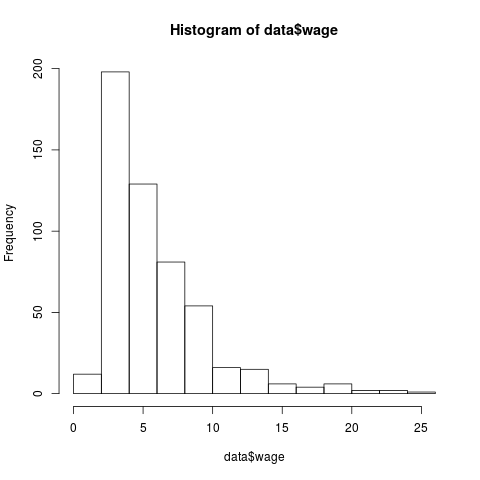

In [199]:
%%R
hist(data$wage)

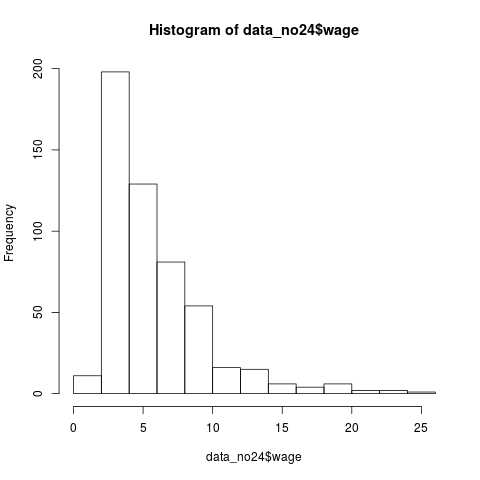

In [200]:
%%R
data_no24 <-data[-24,]
hist(data_no24$wage)

In [ ]:
%%R


In [88]:
%%R
cat('length', length(data_no24[,1]),'\n')
samples <- sample(length(data_no24[,1]),50)
data_test <- data_no24[samples,]
data_train <- data_no24[-samples,]



length 525 


In [93]:
%%R
fit_train <- lm(formula = lwage ~ educ+educsq + exper + expersq + log(tenure + 
    1) + female + smsa +trade + services + 
    profocc + servocc, data = data_train)
#fit_train <- lm(formula = lwage ~  log(tenure + 
#    1) + female + smsa +trade + services + 
#    profocc + servocc, data = data_train)
summary(fit_train)


Call:
lm(formula = lwage ~ educ + educsq + exper + expersq + log(tenure + 
    1) + female + smsa + trade + services + profocc + servocc, 
    data = data_train)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.14442 -0.21025 -0.02327  0.20088  1.25540 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      1.0763547  0.1951632   5.515 5.80e-08 ***
educ            -0.0139566  0.0308393  -0.453 0.651080    
educsq           0.0027335  0.0012845   2.128 0.033863 *  
exper            0.0295710  0.0047212   6.263 8.61e-10 ***
expersq         -0.0006081  0.0001022  -5.952 5.24e-09 ***
log(tenure + 1)  0.0914936  0.0186246   4.913 1.25e-06 ***
female          -0.2733570  0.0345104  -7.921 1.77e-14 ***
smsa             0.1563273  0.0383174   4.080 5.31e-05 ***
trade           -0.2362764  0.0383139  -6.167 1.52e-09 ***
services        -0.1961380  0.0577122  -3.399 0.000736 ***
profocc          0.1706060  0.0425324   4.011 7.04e-05 ***
servocc   

In [184]:
%%R
cat('MSE: ',sum(fit_train$res^2)/length(data_train[,1]),'\n')
MSPR <- sum((data_test$lwage - predict(fit_train, data_test))^2)/length(data_test[,1])
MSPE <- sum((data_test$lwage - mean(data_test$lwage))^2)/length(data_test[,1])
cat('MSPR: ', MSPR, '\n')
cat('MSPE: ', MSPE, '\n')
predict(fit_train, data_test, interval="predict") 

MSE:  0.1254799 
MSPR:  0.1056771 
MSPE:  0.2577575 
          fit         lwr      upr
433 2.2993222  1.58296512 3.015679
183 1.7736434  1.05993390 2.487353
312 1.6629764  0.95271776 2.373235
515 1.7035331  0.98776410 2.419302
190 1.5542063  0.84256385 2.265849
148 1.6650532  0.95547803 2.374628
250 0.9614913  0.23081798 1.692165
196 1.4902618  0.77724776 2.203276
300 1.3023813  0.58006362 2.024699
64  1.3747680  0.66422171 2.085314
303 1.5537957  0.84168958 2.265902
266 1.0332814  0.31156313 1.755000
320 1.7472791  1.03652097 2.458037
396 1.2465571  0.52719034 1.965924
459 1.3953912  0.68619071 2.104592
170 2.3258480  1.61462610 3.037070
362 1.2269149  0.51652890 1.937301
329 1.7502047  1.03906926 2.461340
73  1.9868323  1.27700262 2.696662
123 1.6016706  0.88971871 2.313623
14  1.9209251  1.21139886 2.630451
495 1.5431152  0.83156147 2.254669
130 1.3623874  0.65084291 2.073932
378 1.6829886  0.97188001 2.394097
503 0.7761686 -0.02541748 1.577755
408 1.5549381  0.84041082 2.269465
27

In [94]:
%%R
fit_test <- lm(formula = lwage ~ educ + educsq + exper + expersq + log(tenure + 
    1) + female + smsa +trade + services + 
    profocc + servocc, data = data_test)
fit_test$coef - fit_train$coef

    (Intercept)            educ          educsq           exper         expersq 
   0.5156213627   -0.0700773529    0.0030820826   -0.0320357086    0.0005997081 
log(tenure + 1)          female            smsa           trade        services 
   0.0561215785   -0.0006026287    0.1172362800    0.0068646844    0.0005711871 
        profocc         servocc 
  -0.0117792399   -0.0358675791 


In [122]:
%%R
wage_prediction <- data.frame( data_test$wage, exp(predict(fit_train, data_test)), 
                              abs(data_test$wage - exp(predict(fit_train, data_test))),
                             data_test$lwage , predict(fit_train, data_test),
                             abs(data_test$lwage - (predict(fit_train, data_test)))) #-predict(fit_train, data_test)

colnames(wage_prediction) <- c('real','pred','diff', 'lwage', 'lpred','ldiff')
wage_prediction

     real      pred       diff     lwage     lpred       ldiff
433 10.00  9.967424 0.03257589 2.3025850 2.2993222 0.003262813
183  7.60  5.892282 1.70771775 2.0281480 1.7736434 0.254504599
312  3.33  5.274988 1.94498796 1.2029720 1.6629764 0.460004397
515  9.00  5.493321 3.50667850 2.1972250 1.7035331 0.493691919
190  4.55  4.731330 0.18132970 1.5151270 1.5542063 0.039079284
148  4.50  5.285955 0.78595456 1.5040770 1.6650532 0.160976219
250  3.00  2.615594 0.38440569 1.0986120 0.9614913 0.137120657
196  6.25  4.438257 1.81174272 1.8325820 1.4902618 0.342320206
300  3.00  3.678045 0.67804479 1.0986120 1.3023813 0.203769303
64   3.71  3.954159 0.24415932 1.3110320 1.3747680 0.063736018
303  3.00  4.729387 1.72938739 1.0986120 1.5537957 0.455183679
266  2.90  2.810272 0.08972757 1.0647110 1.0332814 0.031429570
320  4.00  5.738966 1.73896604 1.3862940 1.7472791 0.360985062
396  3.76  3.478347 0.28165311 1.3244190 1.2465571 0.077861852
459  4.00  4.036553 0.03655320 1.3862940 1.3953912 0.00

In [131]:
%%R
for (i in seq(0.4,0.6,by=0.01)){
    cat(i,sum(wage_prediction$ldiff < i)/length(wage_prediction$diff),'\n')
        #sum(wage_prediction$diff < exp(i))/length(wage_prediction$diff),'\n')
    }

0.4 0.74 
0.41 0.76 
0.42 0.78 
0.43 0.78 
0.44 0.8 
0.45 0.8 
0.46 0.82 
0.47 0.88 
0.48 0.88 
0.49 0.88 
0.5 0.9 
0.51 0.92 
0.52 0.92 
0.53 0.92 
0.54 0.92 
0.55 0.92 
0.56 0.92 
0.57 0.92 
0.58 0.92 
0.59 0.94 
0.6 0.94 


In [138]:
%%R
model <- c('lwage', 'educ','educsq','exper','expersq','tenure','female', 'smsa', 'trade', 'services','profocc', 'servocc')
fit_AIC <- lm(formula = lwage ~ ., data = data[,model])
summary(fit_AIC)


Call:
lm(formula = lwage ~ ., data = data[, model])

Residuals:
     Min       1Q   Median       3Q      Max 
-1.58499 -0.20715 -0.02643  0.20975  1.30206 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.187e+00  1.724e-01   6.882 1.72e-11 ***
educ        -2.758e-02  2.745e-02  -1.005  0.31557    
educsq       3.372e-03  1.158e-03   2.911  0.00376 ** 
exper        2.957e-02  4.442e-03   6.656 7.23e-11 ***
expersq     -6.021e-04  9.607e-05  -6.268 7.76e-10 ***
tenure       1.245e-02  2.632e-03   4.732 2.88e-06 ***
female      -2.644e-01  3.336e-02  -7.924 1.44e-14 ***
smsa         1.607e-01  3.656e-02   4.396 1.34e-05 ***
trade       -2.339e-01  3.707e-02  -6.311 5.99e-10 ***
services    -2.492e-01  5.544e-02  -4.494 8.62e-06 ***
profocc      1.775e-01  4.131e-02   4.296 2.08e-05 ***
servocc     -1.341e-01  4.941e-02  -2.715  0.00685 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3632 on 514 degree

In [194]:
%%R
pred <- predict(fit_train, data_test, interval="predict") 
data.frame(pred, data_test$lwage)


          fit         lwr      upr data_test.lwage
433 2.2993222  1.58296512 3.015679       2.3025850
183 1.7736434  1.05993390 2.487353       2.0281480
312 1.6629764  0.95271776 2.373235       1.2029720
515 1.7035331  0.98776410 2.419302       2.1972250
190 1.5542063  0.84256385 2.265849       1.5151270
148 1.6650532  0.95547803 2.374628       1.5040770
250 0.9614913  0.23081798 1.692165       1.0986120
196 1.4902618  0.77724776 2.203276       1.8325820
300 1.3023813  0.58006362 2.024699       1.0986120
64  1.3747680  0.66422171 2.085314       1.3110320
303 1.5537957  0.84168958 2.265902       1.0986120
266 1.0332814  0.31156313 1.755000       1.0647110
320 1.7472791  1.03652097 2.458037       1.3862940
396 1.2465571  0.52719034 1.965924       1.3244190
459 1.3953912  0.68619071 2.104592       1.3862940
170 2.3258480  1.61462610 3.037070       2.7330680
362 1.2269149  0.51652890 1.937301       1.2556160
329 1.7502047  1.03906926 2.461340       1.5665300
73  1.9868323  1.27700262 2.696